In [1]:
import matplotlib.pyplot as pyplot
import numpy
import math
import scipy.integrate as integrate

In [2]:
N = [2, 4, 6, 8, 10, 12]

In [3]:
def product(t, n, k):
    result = 1
    for i in range(n + 1):
        if i != k:
            result *= (t - i)
    return result

In [4]:
def calculateA(n, h):
    A = [0]*(n+1)

    for k in range(n + 1):
        c = (math.pow(-1, n-k) * h) / (math.factorial(k) * math.factorial(n - k))
        I = integrate.quad(product, 0, n, args=(n, k))[0]
        A[k] = c * I
    return A

In [5]:
def NewtonCotesQuadrature(f, a, b, n):
    sum = 0
    h = (b - a) / n
    A = calculateA(n, h)

    for k in range(n + 1):
        sum += A[k] * f(a + k * h)
    return sum

In [6]:
def f(x):
    return 1 / (1 + x**2)

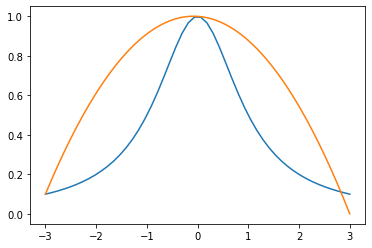

In [7]:

X = numpy.linspace(-3, 3, 50)
original = [f(x) for x in X]

degree = 3
X1 = numpy.linspace(-3, 3, degree)
points = [[x, f(x)] for x in X1]
pointsY = [p[1] for p in points]

def productLagrange(x, n, k, points):
    result = 1
    for i in range(n + 1):
        if i != k:
            result *= (x - points[i][0]) / (points[k][0] - points[i][0])
    return result

def LagrangePolynomial(points, x, k):
    k = k-1
    sum = 0
    for j in range(k):
        sum += points[j][1] * productLagrange(x, k, j, points)
    return sum

  

lagrangeP = []
X2 = numpy.linspace(-3, 3, 100)
for x in X2:
    lagrangeP.append(LagrangePolynomial(points, x, degree))

pyplot.plot(X, original)
pyplot.plot(X2, lagrangeP)

Newton-Cotes for n=3 evenly spaced points
Value=2.4000000000000004
Exact=2.498091544796509
Error=0.039266593332350795


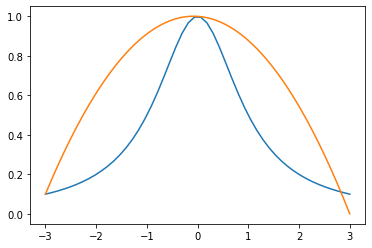

Newton-Cotes for n=5 evenly spaced points
Value=2.348057713651498
Exact=2.498091544796509
Error=0.06005938071306039


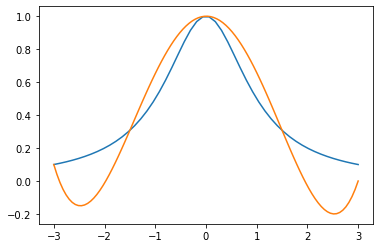

Newton-Cotes for n=7 evenly spaced points
Value=2.5962787275649095
Exact=2.498091544796509
Error=0.039304877746743606


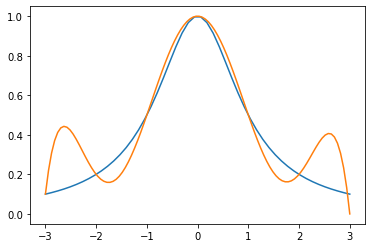

Newton-Cotes for n=9 evenly spaced points
Value=2.39549348015068
Exact=2.498091544796509
Error=0.041070578401956104


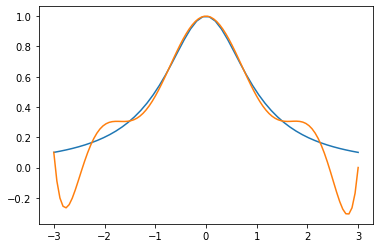

Newton-Cotes for n=11 evenly spaced points
Value=2.6090160858910134
Exact=2.498091544796509
Error=0.04440371343698708


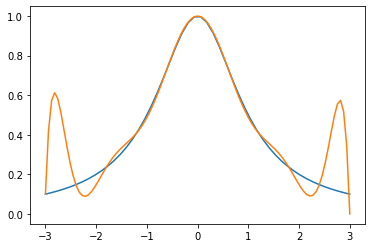

Newton-Cotes for n=13 evenly spaced points
Value=2.3700657002226104
Exact=2.498091544796509
Error=0.05124946074957683


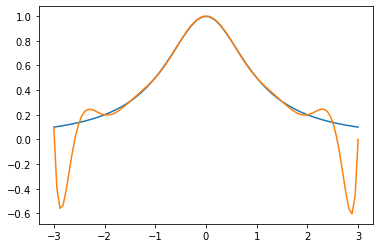

In [8]:
arctg = 2 * math.atan(3)
a = -3
b = 3
for i in N:
    i += 1
    newtoncotes = NewtonCotesQuadrature(f, a, b, i)
    error = abs((newtoncotes - arctg)) / arctg
    print(f"Newton-Cotes for n={i} evenly spaced points\nValue={newtoncotes}\nExact={arctg}\nError={error}")
    
    X1 = numpy.linspace(-3, 3, i)
    points = [[x, f(x)] for x in X1]
    pointsY = [p[1] for p in points]

    lagrangeP = []
    X2 = numpy.linspace(-3, 3, 100)
    for x in X2:
        lagrangeP.append(LagrangePolynomial(points, x, i))

    pyplot.plot(X, original)
    pyplot.plot(X2, lagrangeP)
    pyplot.show()